# Machine Learning - TP1

Dans ce premier TP, vous allez implémenter par vous-même (sans utilisation de scikit-learn pour l'instant !) les algorithmes de Régression Linéaire avec descente de gradient et de Régression Logistique.

Le sujet de TP est fourni sous forme de Jupyter Notebook, les réponses au TP (implémentation) sont à remplir dans le notebook.

Pour éditer un notebook, vous pouvez utiliser :

- [Google Colab](https://colab.google/) : une application Web mise à disposition par Google, spécialisée pour la recherche, l'enseignement, et l'IA (GPUs disponibles). Attention : nous ne sommes pas sûrs que vous pourrez obtenir une session, Colab peut fermer des sessions s'il considère qu'il y a trop d'utilisateurs connectés en même temps !

- [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html) : un logiciel en Python auquel vous pouvez accéder via votre navigateur. Il s'agit de l'interface "officielle" par l'organisation qui gère le format "notebook" (Jupyter), elle fonctionne donc très bien.
  - [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html) est l'outil recommandé : il s'installe facilement et est la version mise en avant par Jupyter pour les années à venir.
  - [JupyterNotebook](https://jupyter-notebook.readthedocs.io/en/stable/) est plus ancien : il n'est plus recommandé par Jupyter, est remplacé par Lab, et ne sera plus disponible. Ne l'installez pas sauf si vous savez ce que vous faites !
  - [JupyterHub](https://jupyter.org/hub) est plus adapté aux groupes d'utilisateurs (entreprise) : il permet d'avoir des notebooks en parallèle, sur différentes ressources, ... Ce n'est pas utile pour votre cas d'usage.

- L'éditeur (IDE) de votre choix :
  - VS Code : [extension Jupyter](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter)
  - PyCharm : [intégration native](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html)
  - (autre ...)

Pour faire simple, nous recommandons **Jupyter Lab** : https://jupyter.org/install

```shell
pip install jupyterlab
jupyter lab
```

Il vous faudra également installer les paquets Python suivants :

- [NumPy](https://pypi.org/project/numpy/)
- [Pandas](https://pypi.org/project/pandas/)
- [Matplotlib](https://pypi.org/project/matplotlib/)
- [Seaborn](https://pypi.org/project/seaborn/)
- [Scikit-learn](https://pypi.org/project/scikit-learn/)

Ces paquets seront déjà disponibles dans un environnement Google Colab ; vous devrez les installer manuellement dans toutes les autres situations (Jupyter Lab, VS Code, PyCharm, ...).

```shell
pip install numpy pandas matplotlib seaborn scikit-learn
```

In [91]:
import numpy as np               # Algèbre linéaire
import pandas as pd              # Traitement de données, lecture de jeux de données
import matplotlib.pyplot as plt  # Librairie graphique (plots)
import seaborn as sns            # Surcouche plus facile au-dessus de matplotlib

sns.set()                        # Change quelques réglages globaux pour rendre les plots plus jolis

## Exercice 1 : Régression Linéaire sur données 2D

Pour se mettre en appétit, on reprend les bases de la régression linéaire : le jeu de données représente des données 2D, avec une relation facile à visualiser.
Nous utiliserons les données des fichiers `data1_train.csv` et `data1_test.csv`.

Q1. Utilisez la librairie [Pandas](https://pandas.pydata.org/) pour charger les fichiers dans des DataFrame `df_droite_train` et `df_droite_test` (par convention, on préfixera souvent un DataFrame par `df`, mais ce n'est pas obligatoire).

<details>
<summary>Astuce</summary>
Utilisez la méthode <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv">pd.read_csv</a>
</details>

In [92]:
df_droite_train = pd.read_csv('data1_train.csv') # On charge les données
df_droite_test = pd.read_csv('data1_test.csv') # On charge les données

Q2. Utilisez Pandas pour décrire les données :

- Quelles sont les colonnes ?
- Combien de lignes (entrées) contiennent-elles ?
- Quels sont les types de ces colonnes ?
- Quelles sont les valeurs minimales, moyennes, les quartiles, ... ?

<details>
<summary>Astuce</summary>
Regardez l'attribut <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html#pandas.DataFrame.dtypes">df.dtypes</a> et la méthode <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe">df.describe()</a>
</details>

In [93]:
# Description des données d'entraînement
print("Description des données d'entraînement :")
print(df_droite_train.describe())
print("\nTypes des colonnes d'entraînement :")
print(df_droite_train.dtypes)

Description des données d'entraînement :
               x          y
count  50.000000  50.000000
mean    0.500000   1.059018
std     0.297498   0.395989
min     0.000000   0.346486
25%     0.250000   0.773410
50%     0.500000   1.019040
75%     0.750000   1.353827
max     1.000000   1.873943

Types des colonnes d'entraînement :
x    float64
y    float64
dtype: object


In [94]:
# Description des données de test
print("\nDescription des données de test :")
print(df_droite_test.describe())
print("\nTypes des colonnes de test :")
print(df_droite_test.dtypes)


Description des données de test :
                x           y
count  100.000000  100.000000
mean     0.500000    1.076500
std      1.047717    1.375653
min     -1.000000   -0.893000
25%     -0.494898   -0.229801
50%      0.500000    1.076500
75%      1.494898    2.382801
max      2.000000    3.046000

Types des colonnes de test :
x    float64
y    float64
dtype: object


Q3. Utilisez la librairie [Matplotlib](https://matplotlib.org/) ou [Seaborn](https://seaborn.pydata.org/index.html) pour visualiser graphiquement les données d'entraînement.

- Matplotlib est plus flexible, mais demande de tout spécifier soi-même ; les données sont généralement sous forme de listes.
- Seaborn contient des "recettes" toutes faites pour des cas typiques, et s'interface très bien avec Pandas : on peut spécifier un DataFrame comme source de données, puis indiquer que l'axe X correspond à la colonne "foo", l'axe Y à la colonne "bar", que l'on veut grouper par la colonne "baz", etc. Puisque Seaborn est une surcouche de Matplotlib, on peut quand même tout personnaliser, à condition de mettre les mains dans le cambouis.

<details>
<summary>Astuce</summary>
Utilisez la méthode <a href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html">sns.scatterplot</a> pour visualiser un nuage de points à partir des données X et Y.
</details>

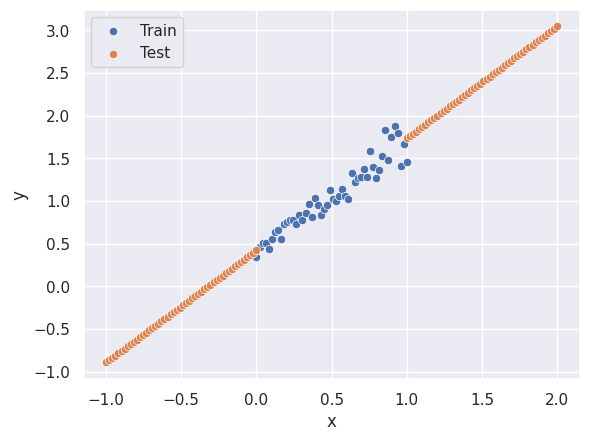

In [95]:
# df_droite_test.plot.scatter(x='x', y='y', title='Données de test')
# plt.show()
# df_droite_train.plot.scatter(x='x', y='y', title='Données d\'entraînement')
# plt.show()

sns.scatterplot(x='x', y='y', data=df_droite_train, label='Train')
sns.scatterplot(x='x', y='y', data=df_droite_test, label='Test')
plt.show()


Q4. Quelle relation semble probable entre ces données ? En déduire une formule abstraite $y = f(x)$ (utilisez $w_0$, $w_1$, ..., $w_n$ pour les paramètres).

<details>
<summary>Astuce</summary>
Pas d'astuce pour celle-là, on l'a répétée en cours plein de fois ! :-)
</details>

$ y = w_1 \cdot x + w_0 $  

Q5. On veut maintenant trouver un modèle permettant de prédire les données de test, c'est-à-dire les paramètres $\mathbf{w}$ qui offrent la plus petite erreur sur les données d'entraînement. On commence par préparer les données : on va travailler avec des [np.ndarrays](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) plutôt que des DataFrame, afin de pouvoir manipuler ces vecteurs plus facilement (addition, multiplication, ...) et plus efficacement (NumPy utilise du code C en arrière-plan pour optimiser).

Divisez vos données d'entraînement et de test en `X_droite_train, Y_droite_train, X_droite_test, Y_droite_test`.

<details>
<summary>Astuce</summary>
Ici, le jeu de données est simple et ne contient que 2 colonnes : 1 colonne de features (X) et 1 colonne de labels (Y). On peut donc directement les récupérer par <a href="https://pandas.pydata.org/docs/user_guide/indexing.html#basics">indexation</a>.
Quand il y a plus de colonnes, il peut être laborieux de les sélectionner 1 par 1 ; il est alors plus simple de supprimer (<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop">drop</a>) les colonnes qu'on ne veut pas.

Ensuite, pour passer à un vecteur NumPy, utilisez <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy">s.to_numpy()</a> ou le constructeur <a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html">np.ndarray</a>.
</details>

In [96]:
# utilisation de numpy pour la regression lineaire
X_droite_train, Y_droite_train = df_droite_train.to_numpy().transpose()[0], df_droite_train.to_numpy().transpose()[1]
X_droite_test, Y_droite_test = df_droite_test.to_numpy().transpose()[0], df_droite_test.to_numpy().transpose()[1]

# X = df_droite_test.to_numpy()[:, 0] # toutes les lignes, colonne 0
# X = df_droite_train['x'].to_numpy()
# X == X_droite_train # "is" fais corresondre les adresses mémoires, donc revoie false ici

On cherche a obtenir un array (n,) !! Et non (1,n) ou (n,1) pour les vecteurs.

Q5bis. Bonne pratique : vous devriez toujours vérifier le [shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html#numpy.ndarray.shape) de vos ndarrays. En particulier, assurez-vous que le nombre de colonnes est correct (ici, c'est facile : il n'y en a qu'une !), et que le nombre d'individus dans X correspond au nombre d'individus dans Y. Il n'est pas rare de voir des `assert a.shape == (truc, bidule)` ou encore `assert len(a.shape) == 2` (vérifie que le tableau contient 2 dimensions) pour s'assurer que les données reçues correspondent (en forme) à ce qu'on attend.

<details>
<summary>Astuce</summary>
L'attribut <a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html#numpy.ndarray.shape">a.shape</a> d'un ndarray nommé `a` est un tuple indiquant le nombre d'éléments pour chaque dimension. Par exemple, `(10, 2,)` signifie que le tableau contient 10 lignes, 2 colonnes.
</details>

In [97]:
assert len(X_droite_train) == len(Y_droite_train)
assert len(X_droite_test) == len(Y_droite_test)
len(X_droite_train)

50

Q6. On va maintenant commencer à implémenter la Régression Linéaire avec descente de gradient. Initialisez un ndarray de paramètres `w` aléatoirement entre 0 et 1 (distribution uniforme). La taille du tableau dépend de votre réponse à la question Q4.

<details>
<summary>Astuce</summary>
Utilisez la méthode <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html#numpy.random.uniform">np.random.uniform</a> ; elle est similaire à `np.random.rand()`, `np.random.random()` et `np.random.random_sample()` mais plus configurable et plus clairement nommée. Je vous recommande d'utiliser des arguments nommés (<i>keyworded-args</i> ou <i>kwargs</i> en Python) pour rendre votre code lisible au premier coup d'oeil, sans avoir besoin de se rappeler de la doc de chaque fonction par coeur.
</details>

In [98]:
W = np.random.uniform(0, 1, 2) # creation de w0 et w1 (d'ou les deux elements)
W

array([0.8966547 , 0.93263832])

Q7. Ajoutez une colonne de biais, c'est-à-dire ne contenant que des 1, à vos features `X_droite_train` et `X_droite_test`.
Par convention, on ajoute cette colonne au début des features, afin qu'elle corresponde au paramètre $w_0$ ; la 1ère "vraie" feature $x_1$ correspondra donc au paramètre $w_1$, etc.

<details>
<summary>Astuce</summary>
On peut utiliser <a href="https://numpy.org/doc/stable/reference/generated/numpy.ones.html#numpy.ones">np.ones(shape)</a> pour générer un ndarray ne contenant que des 1 de forme `shape`, ou <a href="https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html#numpy.ones_like">np.ones_like(a)</a> pour générer un ndarray ne contenant que des 1 avec la même forme que `a`.

(Pour information, np.zeros(shape) et np.zeros_like(a) fonctionnent de la même manière)

Vous aurez probablement besoin de changer la forme du tableau de features via <a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html#numpy.ndarray.reshape">a.reshape()</a> : en l'état, `X_droite_train` et `X_droite_test` sont des tableaux 1D, ne contenant qu'une seule dimension. La notion de lignes ou de colonnes n'a donc pas de sens. À la place, on veut un tableau 2D de shape $(n, 1)$, c'est-à-dire n lignes (individus) et 1 seule colonne (feature) par ligne.

Ensuite, pour concaténer, il existe plusieurs méthodes, selon <a href="https://www.sharpsightlabs.com/blog/numpy-axes-explained/">l'axe</a> souhaité :
<ul>
    <li><a href="https://numpy.org/doc/stable/reference/generated/numpy.stack.html#numpy.stack">np.stack()</a> (très flexible, configurable ; crée un nouvel axe)</li>
    <li><a href="https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy.concatenate">np.concatenate()</a> (très flexible, configurable ; joint sur un axe existant)</li>
    <li><a href="https://numpy.org/doc/stable/reference/generated/numpy.vstack.html#numpy-vstack">np.vstack()</a> (stack vertical)</li>
    <li><a href="https://numpy.org/doc/stable/reference/generated/numpy.hstack.html#numpy.hstack">np.hstack()</a> (stack horizontal)</li>
    <li><a href="https://numpy.org/doc/stable/reference/generated/numpy.dstack.html#numpy.dstack">np.dstack()</a> (stack en profondeur)</li>
</ul>

In [99]:
ones = np.ones(len(X_droite_train))
print(ones.shape)
print(X_droite_train.shape)
X_droite_train = np.concatenate((ones.reshape(-1, 1), X_droite_train.reshape(-1, 1)), axis=1)
X_droite_test = np.concatenate((np.ones(len(X_droite_test)).reshape(-1, 1), X_droite_test.reshape(-1, 1)), axis=1)

# reshape est utilisé pour passer de (n,) à (n, 1) pour pouvoir concaténer sur les colonnes, dans sans le reshape on a pas de colonnes...


(50,)
(50,)


Q7bis. Vérifiez le shape de vos tableaux (y aviez-vous pensé avant de lire cette question ? :-)) et regardez les premières lignes pour être sûr que chaque colonne est au bon endroit.

<details>
<summary>Astuce</summary>
L'indexation NumPy fonctionne sur chaque axe, en séparant les axes par des virgules. Par exemple, `a[i, j]` veut dire "prendre l'élément dans la ligne i (axe 0) et dans la colonne j (axe 1)".
On rappelle qu'en Python, on peut utiliser `a[start:end]` pour indexer de `start` (inclus) à `end` (non inclus).

Essayez d'obtenir :
- les 5 premières lignes (toutes les colonnes)
- la colonne 1 uniquement des 5 dernières lignes.
</details>

In [100]:
print(X_droite_train[0:5])
print(X_droite_train.transpose()[1][0:5])

[[1.         0.        ]
 [1.         0.02040816]
 [1.         0.04081633]
 [1.         0.06122449]
 [1.         0.08163265]]
[0.         0.02040816 0.04081633 0.06122449 0.08163265]


Q8. Écrivez la fonction `model(X, w)` qui prend en paramètre des données `X` (n individus, k features) et des paramètres `w` (de taille k), et qui renvoie les prédictions pour chaque individu (de taille n), selon la formule de la Régression Linéaire.

<details>
<summary>Astuce</summary>
On rappelle que la régression linéaire est une combinaison linéaire des entrées et des paramètres : $y = \sum_i w_i x_i$.
Puisque nous avons une matrice et un vecteur (ndarrays), on peut utiliser le produit scalaire : <a href="https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot">np.dot()</a>.
</details>

In [101]:
def model(X, w):
    return X.dot(w)

m = model(X_droite_train, W.T)

Au niveau du calcul matricielle on a:

$ y = X \cdot w  
y = \begin{bmatrix}
x_{1,1} & x_{1,2} & ... & x_{1,k} \\
x_{2,1} & x_{2,2} & ... & x_{2,k} \\
... & ... & ... & ... \\
x_{n,1} & x_{n,2} & ... & x_{n,k} \\
\end{bmatrix} \cdot \begin{bmatrix}
w_{1} \\
w_{2} \\
... \\
w_{k} \\
\end{bmatrix}  $
$   = \begin{bmatrix}
x_{1,1} \cdot w_{1} + x_{1,2} \cdot w_{2} + ... + x_{1,k} \cdot w_{k} \\
x_{2,1} \cdot w_{1} + x_{2,2} \cdot w_{2} + ... + x_{2,k} \cdot w_{k} \\
... \\
x_{n,1} \cdot w_{1} + x_{n,2} \cdot w_{2} + ... + x_{n,k} \cdot w_{k} \\
\end{bmatrix}   $  
$ y = (n, k) \cdot (k,) = (n,) $

Q8bis. Vérifiez le shape des prédictions.

In [102]:
m.shape

(50,)

Q9. Affichez visuellement les prédictions sous forme de droite, par-dessus les données d'entraînement. Inspirez-vous de votre réponse à la Q3. Idéalement, changez la couleur de la droite (par exemple en rouge) pour qu'elle soit plus visible.

<details>
<summary>Astuce</summary>
Dans Seaborn, la fonction permettant de tracer une droite est <a href="https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn-lineplot">sns.lineplot()</a>.
</details>

[]

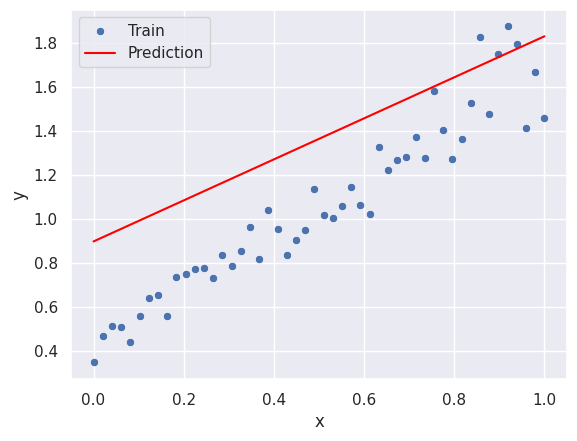

In [103]:
sns.scatterplot(x='x', y='y', data=df_droite_train, label='Train')
sns.lineplot(x=X_droite_train.transpose()[1], y=m, color='red', label='Prediction')
plt.plot()

Q10. Normalement, vos prédictions ne correspondent pas au nuage de points : c'est normal, nous avons initialisé les paramètres aléatoirement.
(Si vos prédictions correspondent, félicitations, et allez jouer au Loto en sortant du cours)

Nous allons maintenant calculer la perte (*loss*) entre les prédictions et les vrais labels, afin de pouvoir ensuite mettre à jour les paramètres en fonction de la perte.
Implémentez une fonction `loss(X, Y, w)` qui renvoie l'erreur quadratique moyenne (MSE) pour tous les individus dans `X` (de forme $(n, k)$), tous les vrais labels dans `Y` (de taille $n$), et selon les paramètres du modèle `w` (de taille $k$).

<details>
<summary>Astuce</summary>

On rappelle tout d'abord la formule de la MSE : 
$$J(w) = \frac{1}{n} \sum_{i=0}^n (x_i \cdot w_i - y_i)^2$$

Avec les tableaux NumPy, beaucoup d'opérations sont *broadcast*, c'est-à-dire qu'elles s'effectuent sur les composants.
Par exemple : `np.array([1, 2, 3]) * 2 == np.array([2, 4, 6])` : on a appliqué l'opération "fois 2" à chacun des éléments du tableau. Il est donc possible de "vectoriser" des opérations mathématiques, plutôt que d'utiliser des boucles Python (très lentes...).

Pour faire la somme de tous les éléments d'un tableau, utilisez <a href="https://numpy.org/doc/stable/reference/generated/numpy.sum.html#numpy.sum">np.sum()</a>
</details>

In [104]:
def loss(X, Y, w):
    return np.sum((model(X, w) - Y) ** 2) / len(X)

Q10bis. Affichez la loss pour les prédictions avec les paramètres initiaux.

In [105]:
l = loss(X_droite_train, Y_droite_train, W)
l

np.float64(0.11517901361128592)

Q11. Implémentez la fonction `grad(X, Y, w)` qui retourne le gradient de la fonction d'erreur.

<details>
<summary>Astuce</summary>

On rappelle la formule du gradient de la MSE vue en cours :
$$\nabla J(w) = \frac{2}{n} X^T (X \cdot w - Y)$$
</details>

In [106]:
def grad(X, Y, w):
    return (2/ len(X)) * X.T.dot(X.dot(w) - Y) 

Q12. Implémentez la descente de gradient (non-stochastique : sur l'ensemble des individus en même temps) dans une fonction `gradient_descent(X, Y, w, learning_rate, n_iterations)`.

La fonction devra calculer le gradient sur l'ensemble des individus $(X, Y)$ avec les points $w$ actuels, puis mettre à jour les poids $w$ (pondéré par le taux d'apprentissage `learning_rate` ou `lr`), répété `n_iterations` fois.
Elle renverra pour finir les paramètres $w$ finaux, appris au terme de la boucle.

In [107]:
def gradient_descent(X, Y, w, learning_rate, n_iters):
    for i in range(n_iters):
        w = w - learning_rate * grad(X, Y, w)
        if i % 1_000 == 0:
            print(f'Iteration {i}, loss = {loss(X, Y, w)}')
    return w

Q12 bonus. Implémentez la descente de gradient stochastique dans une fonction `sgd(X, Y, w, learning_rate, n_iterations)`.

Pour rappel, dans la SGD on ne traite les individus qu'1 par 1 (une itération reste le traitement de tous les individus 1 fois). Pour réutiliser au maximum les fonctions déjà implémentées, il faudra que les individus soient des matrices 2D ne contenant qu'1 seule ligne (comme si on avait une population de taille 1).

In [108]:
def sgd(X, Y, w, learning_rate, n_iters):
    for i in range(n_iters):
        for j in range(len(X)):
            w = w - learning_rate * grad(X[j].reshape(1, -1), Y[j], w)
        if i % 1_000 == 0:
            print(f'Iteration {i}, loss = {loss(X, Y, w)}')
    return w

Q13. Exécutez la descente de gradient pour obtenir les poids finaux `w_optimal`. Vérifiez maintenant votre modèle appris sur les données de test : affichez la loss entre les prédictions du modèle sur les `X_droite_test` et les labels `Y_droite_test`.

In [109]:
W = gradient_descent(X_droite_train, Y_droite_train, W, 0.001, 10_000)

Iteration 0, loss = 0.11475020889820754
Iteration 1000, loss = 0.027548979179603975
Iteration 2000, loss = 0.02358218524773433
Iteration 3000, loss = 0.020952720324716113
Iteration 4000, loss = 0.01895497545884511
Iteration 5000, loss = 0.0174353634318018
Iteration 6000, loss = 0.016279438378221652
Iteration 7000, loss = 0.015400159448604279
Iteration 8000, loss = 0.01473131726529728
Iteration 9000, loss = 0.014222548260258306


In [110]:
W = sgd(X_droite_train, Y_droite_train, W, 0.001, 10_000)
W

Iteration 0, loss = 0.013819142939282538
Iteration 1000, loss = 0.012605508273631733
Iteration 2000, loss = 0.012605514297666851
Iteration 3000, loss = 0.012605514305545254
Iteration 4000, loss = 0.012605514305553631
Iteration 5000, loss = 0.012605514305553643
Iteration 6000, loss = 0.012605514305553643
Iteration 7000, loss = 0.012605514305553643
Iteration 8000, loss = 0.012605514305553643
Iteration 9000, loss = 0.012605514305553643


array([0.42122419, 1.27567129])

Q14. Visualisez maintenant les prédictions par-dessus le nuage de points, en incluant cette fois les données de test dans le plot en plus des données d'entraînement (idéalement, dans une couleur différente, par exemple vert). Inspirez-vous de la Q9.

Remarque : vous devriez voir sur le graphique que les données d'entraînement ont été bruitées, mais pas celles de test. Cela permet, dans le cadre de cet exercice, de vérifier si votre algorithme a été capable d'apprendre un modèle précis du phénomène que l'on cherchait à modéliser, et que vous ne connaissiez pas (vous n'aviez que des exemples de ce phénomène, via les données d'entraînement).
Dans la pratique, les données sont souvent bruitées, que ce soit par les capteurs que l'on utilise, une incompréhension du phénomène menant à un manque de données, ... y compris pour les données de test. Il est donc important que les modèles arrivent à "voir au-delà du bruit".

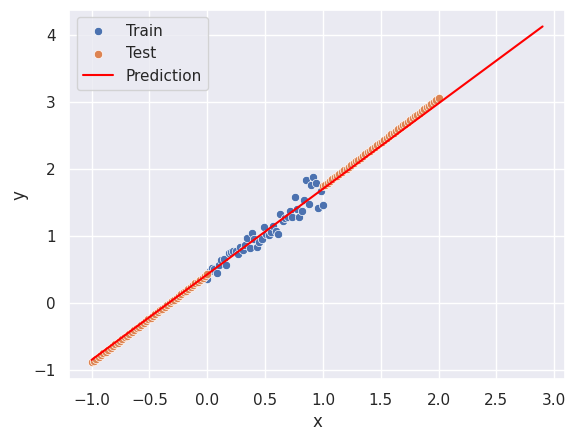

In [111]:
sns.scatterplot(x='x', y='y', data=df_droite_train, label='Train')
sns.scatterplot(x='x', y='y', data=df_droite_test, label='Test')
# prediction avec w
# droite w0 + w1x
x = np.arange(-1, 3, 0.1)
prediction = x*W[1] + W[0]
# plt.plot(np.arange(-1, 3, 0.01), prediction, color='red', label='Prediction')
sns.lineplot(x=x, y=prediction, color='red', label='Prediction')
plt.show()

Q14 bonus. Donnez la formule du phénomène dont vous deviez trouver le modèle ; en d'autres termes, interprétez le modèle appris.

In [112]:
f'y = {W[0]:.3f} + {W[1]:.3f}x'

'y = 0.421 + 1.276x'

Q15. Nous allons maintenant étudier l'impact du nombre d'itérations sur la loss. Pour cela, copiez votre fonction `gradient_descent` en `gradient_descent2`, qui devra, en plus de mettre à jour les paramètres à chaque itération, retenir la loss correspondante, et retourner, en plus des paramètres, le tableau des "loss par pas de temps".
Vous devriez pouvoir réutiliser tout le code que vous aviez écrit.

In [113]:
def gradient_descent2(X, Y, w, learning_rate, n_iters):
    losses = []
    for i in range(n_iters):
        w = w - learning_rate * grad(X, Y, w)
        losses.append(loss(X, Y, w))
    return w, losses

Q16. Affichez la courbe de la loss par rapport aux itérations. Vous devriez lancer votre algorithme sur un grand nombre d'itérations (1 000, par exemple).

<Axes: >

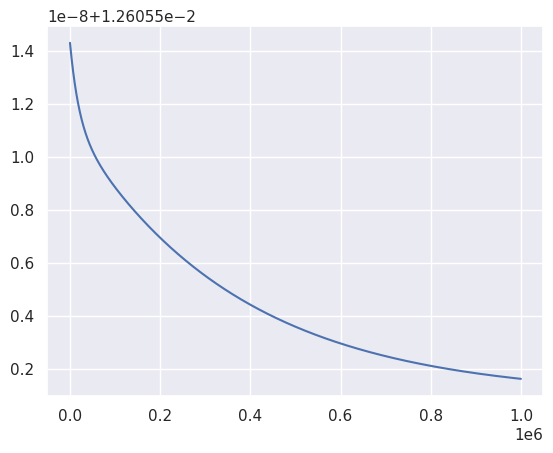

In [114]:
w, losses = gradient_descent2(X_droite_train, Y_droite_train, W, 0.00001, 1_000_000)
sns.lineplot(x=range(len(losses)), y=losses)

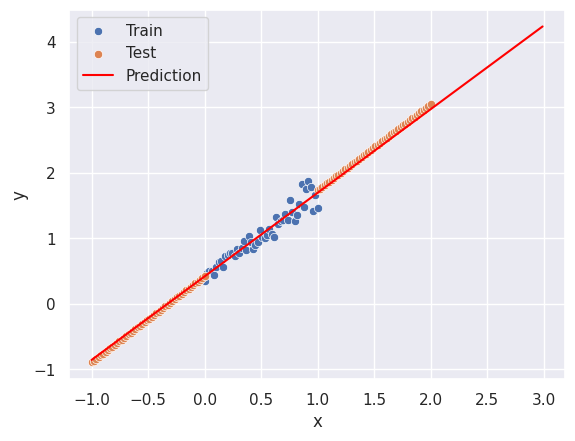

In [115]:
sns.scatterplot(x='x', y='y', data=df_droite_train, label='Train')
sns.scatterplot(x='x', y='y', data=df_droite_test, label='Test')
# prediction avec w
# droite w0 + w1x
x = np.arange(-1, 3, 0.01)
prediction = x*w[1] + w[0]
sns.lineplot(x=x, y=prediction, color='red', label='Prediction')
plt.show()

## Exercice 2 : Régression linéaire polynomiale

Maintenant que vous avez implémenté une régression linéaire, vous devriez être capable d'apprendre n'importe quelle combinaison linéaire de paramètres !

Dans cet exercice, on s'intéresse toujours à des données 2D (c'est plus facile à visualiser), mais dont la relation est un peu plus complexe.

Q1. Chargez les données d'entraînement du fichier `data2_train.csv` dans un DataFrame `df_poly_train` et celles de test du fichier `data2_test.csv` dans un DataFrame `df_poly_test`.

In [116]:
df_poly_train = pd.read_csv('data2_train.csv') 
df_poly_test = pd.read_csv('data2_test.csv')

Q2. Affichez quelques statistiques sur les données d'entraînement : noms des colonnes, types des colonnes, valeurs min, max, quartiles.

In [117]:
print(df_poly_train.describe())
print(df_poly_train.dtypes)

print(df_poly_test.describe())
print(df_poly_test.dtypes)
df_poly_train


                x           y
count  100.000000  100.000000
mean     1.000000   -2.189897
std      2.930454   26.748856
min     -4.000000  -75.117374
25%     -1.500000  -18.510403
50%      1.000000   -5.441735
75%      3.500000    7.633937
max      6.000000   89.960762
x    float64
y    float64
dtype: object
                x           y
count  100.000000  100.000000
mean     1.000000   24.346939
std      6.059214  173.435947
min     -6.000000 -236.000000
25%     -4.989796 -131.129525
50%      1.000000   13.000000
75%      6.989796  178.885460
max      8.000000  310.000000
x    float64
y    float64
dtype: object


,x,y
0,-4.00000,89.960762
1,-3.89899,87.004169
2,-3.79798,58.998636
3,-3.69697,57.313768
4,-3.59596,68.574867
...,...,...
95,5.59596,-44.070669
96,5.69697,-34.256461
97,5.79798,-59.190151
98,5.89899,-57.913633


Q3. Visualisez graphiquement les données d'entraînement.

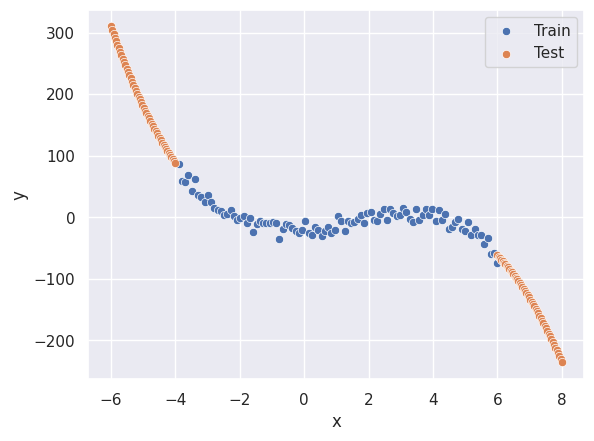

In [118]:
sns.scatterplot(x='x', y='y', data=df_poly_train, label='Train')
sns.scatterplot(x='x', y='y', data=df_poly_test, label='Test')
plt.show()

Q4. À votre avis, de quelle genre de relation s'agit-il ? En déduire une formule abstraite du modèle $y = f(x)$ (utiliser $w_0$, $w_1$, etc. pour les paramètres).

<details>
<summary>Astuce</summary>
C'est un polynôme, à vous de trouver le degré !
</details>

$ y = w_3 \cdot x^3 + w_2 \cdot x^2 + w_1 \cdot x + w_0 $

Q5. Sachant que vous n'avez qu'une seule feature $x$ comme entrée, comment faire pour se rapprocher de la formule abstraite que vous avez identifié en Q4 ? Générez ensuite les données d'entraînement `X2_train`, et de test `X2_test` à partir des DataFrames et de votre réponse. Définissez également `Y2_train` et `Y2_test`.

<details>
<summary>Astuce</summary>

Si on considère que $x$ est une feature, $x^2$ peut en être une autre... Attention à ne pas utiliser de features ayant une relation linéaire entre elles, sinon il y aurait une *perfet collinearity* qui peut empêcher le modèle d'apprendre correctement.
</details>

In [119]:
ones = np.ones([len(df_poly_train), 1])
ones.shape

(100, 1)

Q6. Générez aléatoirement les paramètres `w2` (vecteur de taille $k$, selon vos réponses en Q4 et Q5). Utilisez les méthodes déjà implémentées pour apprendre les poids optimaux `w2_learned` : si les méthodes ont été correctement implémentées, le code devrait fonctionner tel quel.

<details>
<summary>Astuce</summary>

Vous aurez certainement besoin de diminuer le *learning rate* pour limiter les erreurs d'overflow. Pour compenser, il faudra augmenter le nombre d'itérations (les poids seront moins mis à jour à chaque itération, donc il faudra les mettre à jour plus de fois).
</details>

(4,)
(100,)


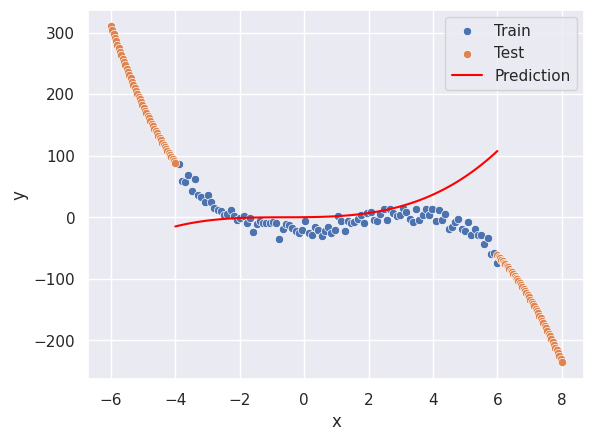

In [120]:
W2 = np.random.uniform(0, 1, 4)
print(W2.shape)

X_poly_train, Y_poly_train = df_poly_train.to_numpy().transpose()[0], df_poly_train.to_numpy().transpose()[1]
X_poly_test, Y_poly_test = df_poly_test.to_numpy().transpose()[0], df_poly_test.to_numpy().transpose()[1]

print(X_poly_train.shape)
X_poly_train = X_poly_train.reshape(-1, 1)

X_poly_train = np.concatenate((ones, X_poly_train, X_poly_train**2, X_poly_train**3), axis=1) # (n, 4)

model2 = model(X_poly_train, W2) # (n, 4) * (4, ) = (n, )

grad2 = grad(X_poly_train, Y_poly_train, W2)

#loss2 = loss(X_poly_train, Y_poly_train, W2)


sns.scatterplot(x='x', y='y', data=df_poly_train, label='Train')
sns.scatterplot(x='x', y='y', data=df_poly_test, label='Test')
#x = np.arange(round(df_poly_train['x'].min()), round(df_poly_train['x'].max()), 1)
x = np.linspace(df_poly_train['x'].min(), df_poly_train['x'].max(), len(X_poly_train))
prediction2 = x**3*W2[3]  + x**2*W2[2] + x*W2[1] + W2[0]

sns.lineplot(x=x, y=prediction2, color='red', label='Prediction')
plt.show()



Q7. Afficher visuellement les prédictions par-dessus les données d'entraînement (idéalement d'une couleur différente, par exemple rouge). La courbe prédite semble-t-elle correspondre aux données ? Sinon, essayez d'augmenter le learning rate (dans la limite des overflows), ou d'augmenter le nombre d'itérations.

[]

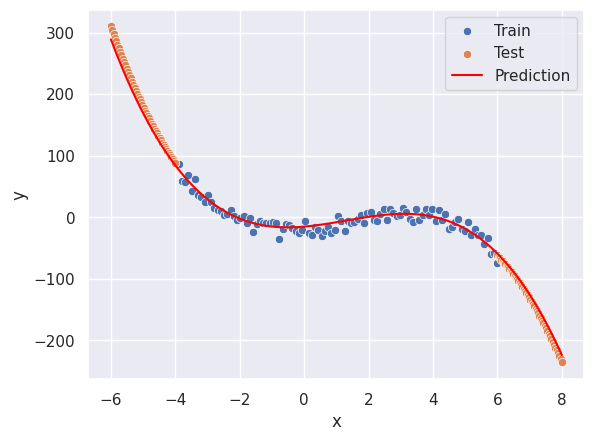

In [121]:
w2, losses2 = gradient_descent2(X_poly_train, Y_poly_train, W2, 0.000_05, 50_000)

sns.scatterplot(x='x', y='y', data=df_poly_train, label='Train')
sns.scatterplot(x='x', y='y', data=df_poly_test, label='Test')
#x = np.arange(round(df_poly_train['x'].min()), round(df_poly_train['x'].max()), 1)
x2 = np.linspace(df_poly_test['x'].min(), df_poly_test['x'].max(), 400)
# prediction avec w2
# courbe w0 + w1x + w2x^2 + w3x^3
prediction2 = x2**3*w2[3]  + x2**2*w2[2] + x2*w2[1] + w2[0]

sns.lineplot(x=x2, y=prediction2, color='red', label='Prediction')
plt.plot()


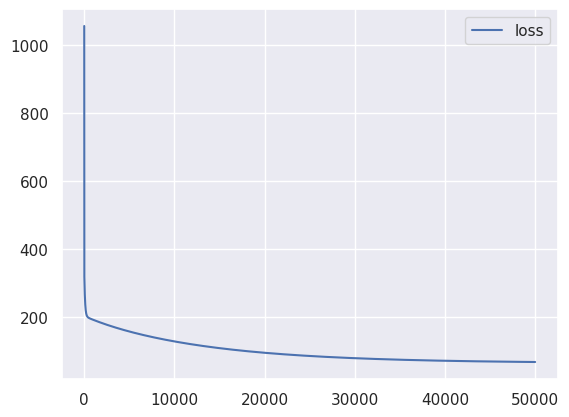

In [122]:
# plot losses
sns.lineplot(x=range(len(losses2)), y=losses2, label='loss')
plt.show()

Q8. Vérifier la loss sur les données de test, et affichez les prédictions visuellement par-dessus le nuage de points (en incluant les données de test en plus de celles d'entraînement, idéalement dans une couleur différente, par exemple vert).

In [123]:
#sns.lineplot(x=range(len(losses2)), y=losses2, Label='Loss')
X_poly_testb = np.concatenate((ones.reshape(len(X_poly_test), 1), X_poly_test.reshape(len(X_poly_test), 1), X_poly_test.reshape(len(X_poly_test), 1)**2, X_poly_test.reshape(len(X_poly_test), 1)**3), axis=1)
loss(X_poly_testb, Y_poly_test, w2)

np.float64(104.79494345667882)

Q9. Quelle est la formule du modèle appris ? En d'autres termes, interprétez le modèle.

In [124]:
f' y = {w2[0]} + {w2[1]}x + {w2[2]}x^2 + {w2[3]}x^3'

' y = -15.293872683406464 + 4.447133980511035x + 3.617751062975306x^2 + -0.9292446298642717x^3'

## Exercice 3 : Application à des données réelles (Starbucks)

Maintenant que vous êtes à l'aise (on l'espère !) avec les régressions linéaires, il est temps de quitter le monde des espaces 2D faciles à visualiser, pour utiliser un *dataset* issu de données réelles. Nous allons dans cet exercice jouer avec les boissons de Starbucks et prédire leur nombre de calories selon leurs caractéristiques.

Pour information, les colonnes `Beverage_category` et `Beverage_prep` sont des données **catégorielles** : elles représentent un type (une catégorie) plutôt qu'une quantité. Vous trouverez ci-dessous la relation entre les valeurs numériques et la catégorie correspondante "dans la vraie vie".

<details>
<summary>Description des données catégorielles</summary>

- Pour `Beverage_category`:

|ID | Catégorie de boisson               |
|---|------------------------------------|
| 0 | Coffee                             |
| 1 | Classic Espresso Drinks            |
| 2 | Signature Espresso Drinks          |
| 3 | Tazo® Tea Drinks                   |
| 4 | Shaken Iced Beverages              |
| 5 | Smoothies                          |
| 6 | Frappuccino® Blended Coffee        |
| 7 | Frappuccino® Light Blended Coffee  |
| 8 | Frappuccino® Blended Crème         |

- Pour `Beverage_prep`:

| ID | Préparation de boisson |
|----|------------------------|
| 0  | Short                  |
| 1  | Tall                   |
| 2  | Grande                 |
| 3  | Venti                  |
| 4  | Short Nonfat Milk      |
| 5  | 2% Milk                |
| 6  | Soymilk                |
| 7  | Tall Nonfat Milk       |
| 8  | Grande Nonfat Milk     |
| 9  | Venti Nonfat Milk      |
| 10 | Solo                   |
| 11 | Doppio                 |
| 12 | Whole Milk             |

Q1. Chargez le fichier `starbucks.csv` dans un DataFrame `df3`.

<details>
<summary>Astuce</summary>

Le fichier a été un peu nettoyé par rapport aux données d'origine, mais il reste quelques erreurs ou surprises. Si vous avez des problèmes en indexant les colonnes, vérifiez le nom des colonnes à double reprise ! Les CSVs mal formés sont un problème fréquent avec des données réelles. Vous avez le choix de corriger les erreurs ou de faire avec.
</details>

In [125]:
df_starbucks = pd.read_csv('starbucks.csv')
df_starbucks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
0,0,Brewed Coffee,0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,175.0
1,0,Brewed Coffee,1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,260.0
2,0,Brewed Coffee,2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,330.0
3,0,Brewed Coffee,3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,410.0
4,1,Caffè Latte,4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,75.0


Q2. Affichez les 10 premières lignes du dataset.

In [126]:
df_starbucks[0:10]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
0,0,Brewed Coffee,0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,175.0
1,0,Brewed Coffee,1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,260.0
2,0,Brewed Coffee,2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,330.0
3,0,Brewed Coffee,3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,410.0
4,1,Caffè Latte,4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,75.0
5,1,Caffè Latte,5,100,3.5,2.0,0.1,15,85,10,0,9,6.0,75.0
6,1,Caffè Latte,6,70,2.5,0.4,0.0,0,65,6,1,4,5.0,75.0
7,1,Caffè Latte,7,100,0.2,0.2,0.0,5,120,15,0,14,10.0,75.0
8,1,Caffè Latte,5,150,6.0,3.0,0.2,25,135,15,0,14,10.0,75.0
9,1,Caffè Latte,6,110,4.5,0.5,0.0,0,105,10,1,6,8.0,75.0


Q3.  Quels sont les noms des colonnes ? Quels sont leur type ? Affichez quelques statistiques (min, max, quartiles, nombre de valeurs) pour chaque colonne.

<details>
<summary>Astuce</summary>

Attention ! Si une colonne n'est pas de type nombre (pas un int ou float, peu importe leur précision), on ne peut pas calculer de min, max, quartiles dessus. On voudrait quand même savoir combien de valeurs sont présentes, quelle est la valeur la plus fréquente, ... Il faut pour cela ajouter un paramètre à la méthode [df.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html), car elle ne le fait pas de base.
</details>

In [127]:
df_starbucks.describe()

,Beverage_category,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,3.348624,6.458716,201.041284,3.074312,1.399541,0.039450,6.674312,136.857798,37.160550,0.844037,33.940367,7.305046,89.931193
std,2.293554,2.447729,102.272308,3.007484,1.687676,0.073137,8.841637,80.426988,20.877234,1.444355,19.913202,4.799032,64.589236
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,122.500000,0.200000,0.100000,0.000000,0.000000,80.000000,21.000000,0.000000,19.000000,4.000000,51.250000
50%,3.000000,6.000000,190.000000,2.500000,0.500000,0.000000,5.000000,127.500000,36.000000,0.000000,33.000000,6.000000,75.000000
75%,6.000000,8.000000,270.000000,5.000000,2.000000,0.100000,10.000000,180.000000,52.500000,1.000000,44.000000,10.000000,143.750000
max,8.000000,12.000000,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,410.000000


Q4. Sur un dataset avec autant de colonnes, et des données variées, les statistiques ne suffisent pas forcément à comprendre les données. Il faut donc visualiser la distribution de ces données.

Pour ce TP1, nous allons rester simples, et visualiser les distributions colonne par colonne. Vous pouvez bien sûr utiliser les méthodes de Matplotlib et Seaborn, mais Pandas propose quelques méthodes directement au niveau du jeu de données pour faciliter cette analyse (les méthodes appellent celles de Matplotlib ensuite). Renseignez-vous brièvement sur les méthodes de visualisation : [Pandas Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization). En particulier, quels sont les différents types de graphiques disponibles ?

In [128]:
df_starbucks['Beverage'].unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Without Whipped Cream)', 'Mocha', 'Caramel',
       'Java Chip', 'Strawberries & Crème (Without Whipped Cream)',


<Axes: xlabel='Beverage'>

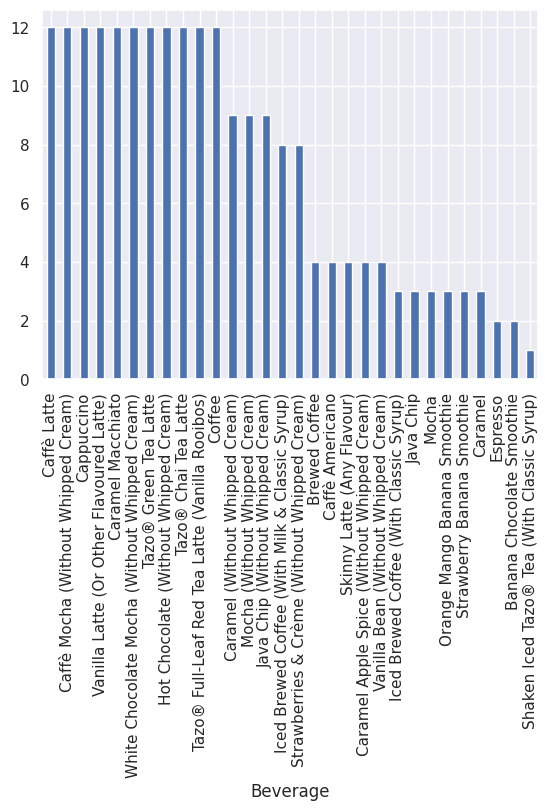

In [129]:
df_starbucks['Beverage'].value_counts().plot(kind='bar')

Q5. Visualisez les données **numériques** (en excluant donc les 3 premières colonnes). Quel type de plot vous semble approprié pour cela ? On veut afficher 1 plot par colonne.

<details>
<summary>Astuce</summary>

Vous pouvez simplement faire une boucle sur les colonnes désirées et demander un plot pour chacune ; ou (plus compliqué), préparer une figure avec des *subplots* (via [plt.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)), puis placer chacun des graphiques dans les bons axes (`subplots` renvoie un objet de type `Figure` et un tableau potentiellement 2D d'`Axes`).
</details>

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

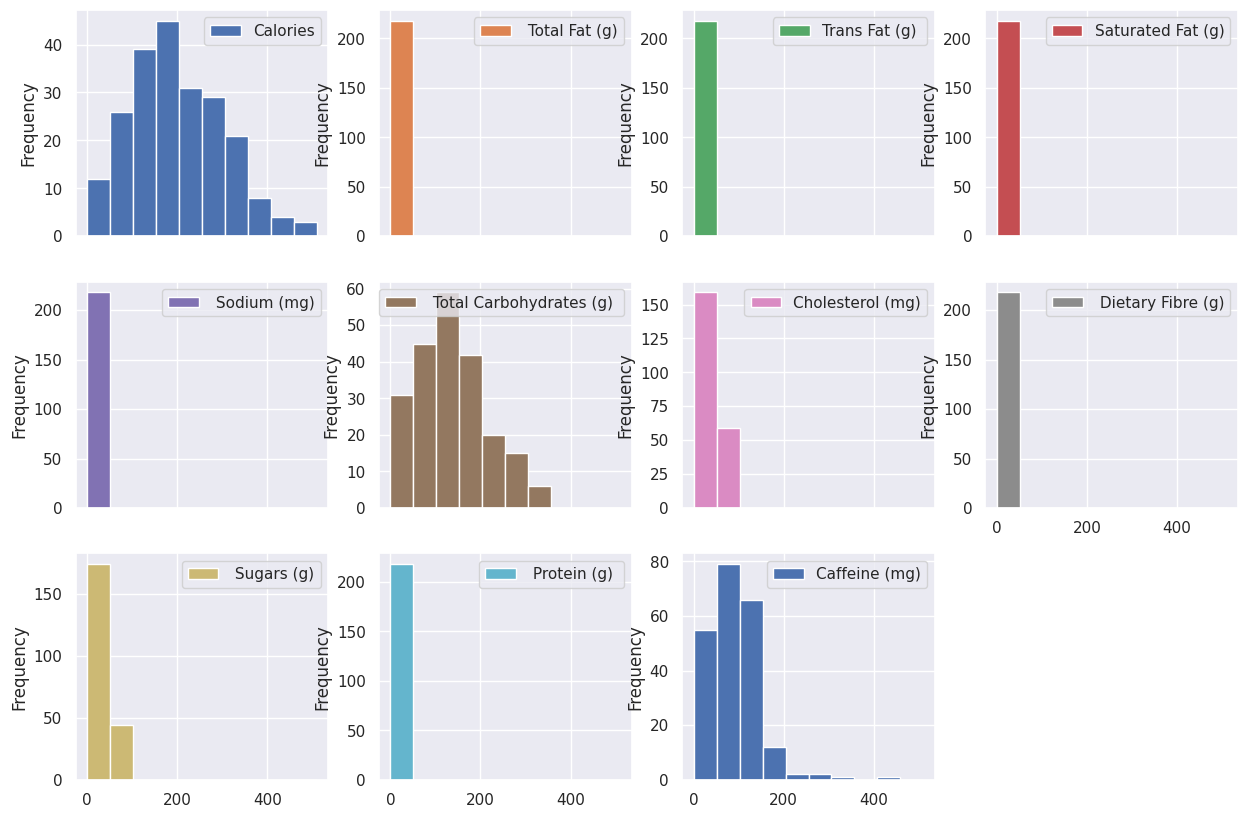

In [130]:
columns = df_starbucks.columns[3:]
# for column in columns:
#     df_starbucks[column].plot(kind='hist', subplots=True)
#     plt.title(column)
# plt.show()
df_starbucks[columns].plot(kind='hist', subplots=True, layout=(3, 4), figsize=(15, 10)) 

Q6. Visualisez maintenant les données **catégorielles**.

<details>
<summary>Astuce</summary>

Malheureusement, la méthode [df.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) n'est pas très intéressante pour les données catégorielles : le type de plot proposé le plus intéressant serait un histogramme (pour afficher le nombre de fois que chaque catégorie apparaît), mais cette méthode utilise des *bins* pour regrouper les données entre elles et faire une estimation. C'est très utile pour des données continues, mais beaucoup moins pour des données catégorielles.

À la place, on peut se tourner vers [sns.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html) qui se base sur le même principe d'histogramme, mais sans *bins* ; elle est donc beaucoup plus appropriée pour les données catégorielles.

Si les labels se superposent et sont illisibles, vous pouvez leur appliquer une rotation via la méthode [ax.tick_params()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tick_params.html) ; attention, il faudra pour cela récupérer un objet `ax` de types `Axes` !
</details>

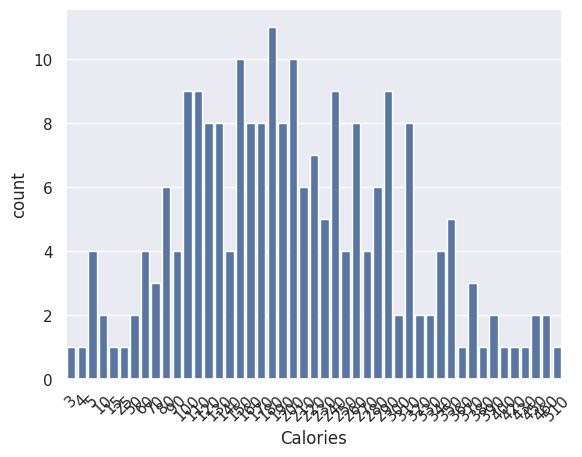

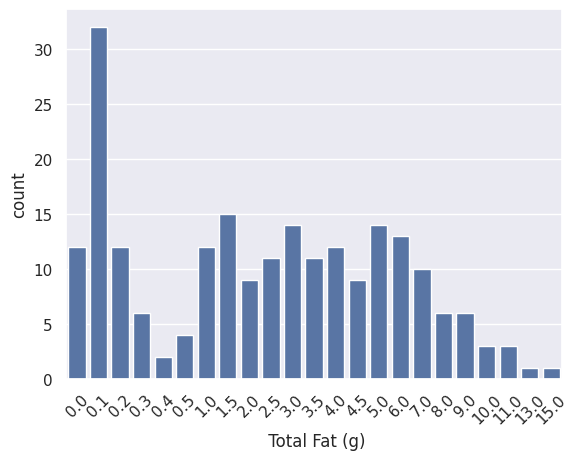

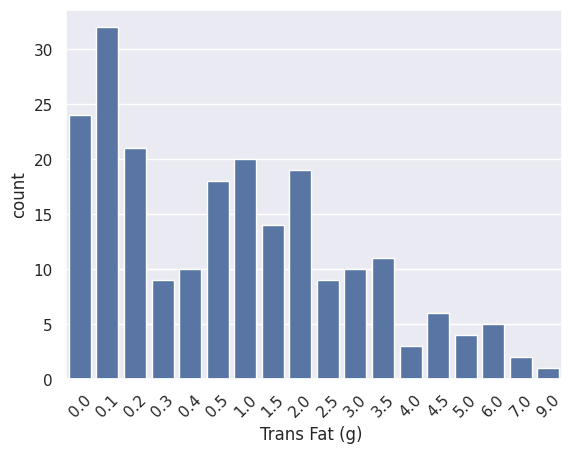

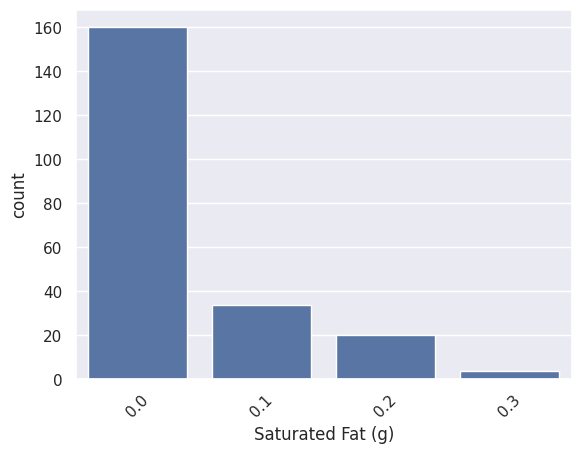

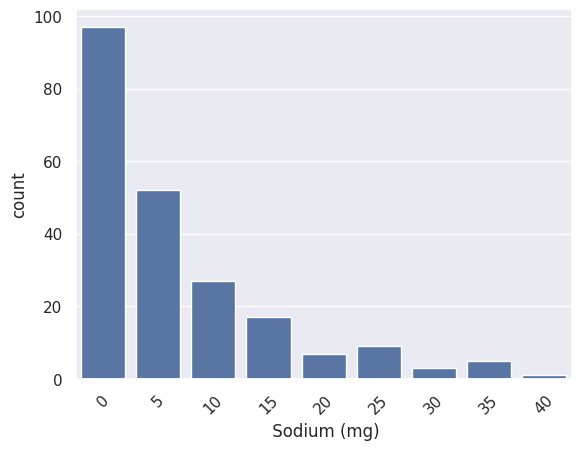

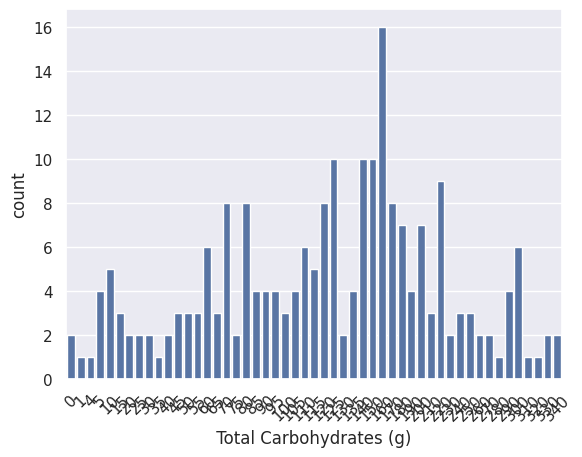

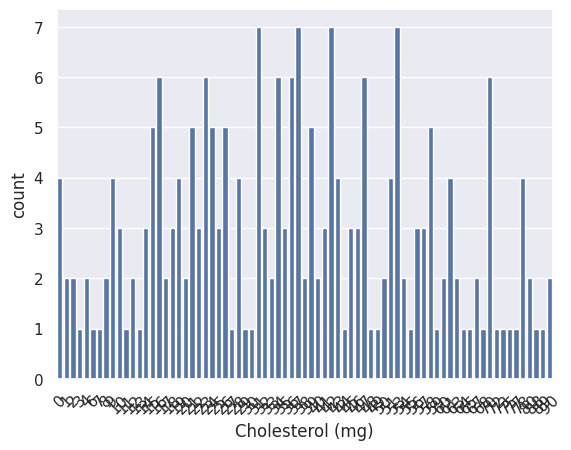

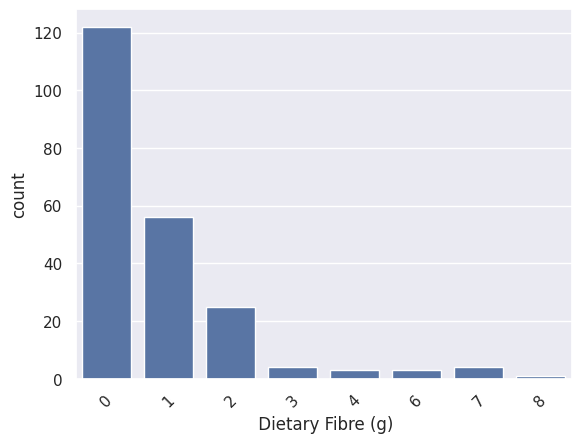

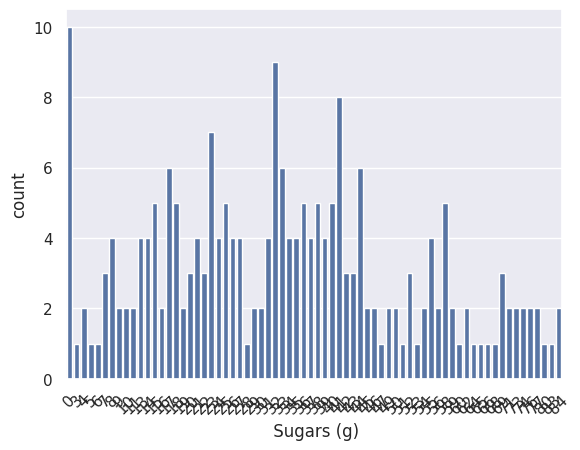

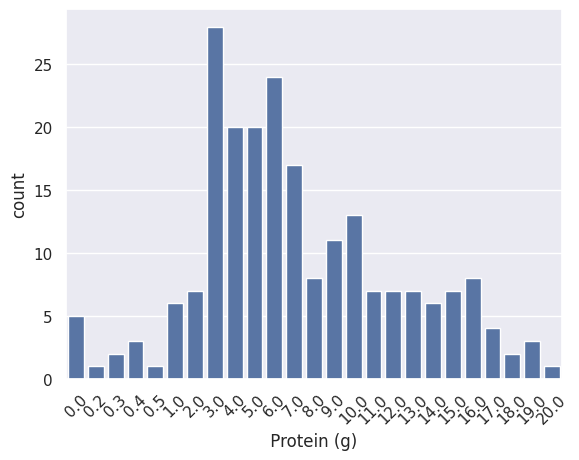

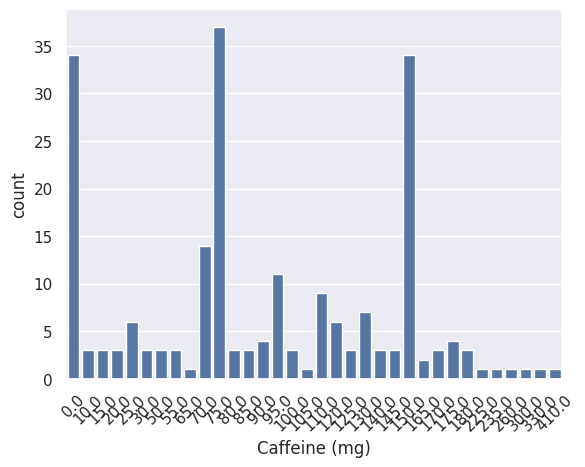

In [131]:

for column in columns:
    sns.countplot(x=column, data=df_starbucks)
    ax = plt.gca()
    ax.tick_params(axis='x', rotation=45)
    plt.show()    
# sns.countplot(x='Beverage_prep', data=df_starbucks)

Q7. La colonne `Beverage` va nous embêter : trop de valeurs (catégories) distinctes possibles, l'algorithme va avoir du mal à apprendre des poids (nous verrons dans les cours suivants comment mieux gérer ce genre de données). Supprimez-la de `df3`.

<details>
<summary>Astuce</summary>

La méthode [df.drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) est votre amie ; attention en particulier à la notion de modification "sur-place" (*inplace*) ou non. Pour la plupart des méthodes de Pandas qui modifient un DataFrame, vous pouvez choisir de modifier le DataFrame ou d'en retourner une copie. Outre les effets de bords possibles, cela va déterminer si vous devez récupérer la valeur de retour de la méthode ou non !
</details>

In [132]:
df_starbucks.drop(columns='Beverage', inplace=True)
df_starbucks.head()


,Beverage_category,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
0,0,0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,175.0
1,0,1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,260.0
2,0,2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,330.0
3,0,3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,410.0
4,1,4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,75.0


Q8. Préparez maintenant les données d'entraînement et de test. Comme nous l'avons vu en cours, on veut généralement 10% à 20% des données initiales dans le jeu de données de test. Ici, il y a peu de données ; si on en met trop dans celles de test, il n'en restera pas assez dans le jeu d'entraînement pour que l'algorithme apprenne un bon modèle. On va donc répartir 90-10 plutôt que 80-20.

Les features sont toutes les colonnes, sauf `'Calories'` ; le label est la colonne `'Calories'`.

Répartissez les données en `X3_train`, `Y3_train`, `X3_test`, et `Y3_test`.

<details>
<summary>Astuce</summary>

Idéalement, on veut choisir les données de test aléatoirement parmi les données originales : cela rend plus probable le fait que les données de test soient similaires aux données d'entraînement (imaginez par exemple que les données soient ordonnées sur une certaine colonne, et que vous ne preniez que les 10 derniers % !).

Scikit-learn contient de nombreuses méthodes pour cela (selon des connaissances à priori sur les données : classes déséquilibrées, dépendance temporelle, ...) ; nous allons faire simple et utiliser [sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Sklearn peut travailler avec des matrices NumPy ou des DataFrames Pandas, vous pouvez donc répartir en "train/test" d'abord puis "X/Y" ou "X/Y" d'abord puis "train/test" ensuite.
</details>

In [133]:
import sklearn as sk
from sklearn import model_selection
print(sk.__version__)

train, test = model_selection.train_test_split(df_starbucks, test_size=0.1)
train.shape, test.shape
X_starbucks_train, Y_starbucks_train = train.drop(columns='Calories'), train['Calories']
X_starbucks_test, Y_starbucks_test = test.drop(columns='Calories'), test['Calories']


1.5.2


Q8bis. Vérifiez les shapes de vos données `X3_train`, `X3_test`, `Y3_train`, `Y3_test`.

In [134]:
X_starbucks_train.shape, Y_starbucks_train.shape, X_starbucks_test.shape, Y_starbucks_test.shape

((196, 12), (196,), (22, 12), (22,))

In [135]:
X_starbucks_train.head()

,Beverage_category,Beverage_prep,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
91,2,6,6.0,1.5,0.0,0,95,32,2,25,9.0,20.0
73,2,6,7.0,1.5,0.0,5,140,36,1,31,11.0,150.0
116,3,6,3.0,0.4,0.0,0,70,22,1,20,6.0,25.0
143,4,8,0.1,0.0,0.0,0,30,24,0,24,2.0,90.0
54,1,5,6.0,3.0,0.2,25,135,16,0,14,10.0,150.0


Q9. Ajoutez la colonne de biais aux features.

In [136]:
ones_starbucks = np.ones([len(X_starbucks_train), 1])
X_starbucks_train = np.concatenate((ones_starbucks, X_starbucks_train), axis=1)
X_starbucks_train[0:5]

array([[1.00e+00, 2.00e+00, 6.00e+00, 6.00e+00, 1.50e+00, 0.00e+00,
        0.00e+00, 9.50e+01, 3.20e+01, 2.00e+00, 2.50e+01, 9.00e+00,
        2.00e+01],
       [1.00e+00, 2.00e+00, 6.00e+00, 7.00e+00, 1.50e+00, 0.00e+00,
        5.00e+00, 1.40e+02, 3.60e+01, 1.00e+00, 3.10e+01, 1.10e+01,
        1.50e+02],
       [1.00e+00, 3.00e+00, 6.00e+00, 3.00e+00, 4.00e-01, 0.00e+00,
        0.00e+00, 7.00e+01, 2.20e+01, 1.00e+00, 2.00e+01, 6.00e+00,
        2.50e+01],
       [1.00e+00, 4.00e+00, 8.00e+00, 1.00e-01, 0.00e+00, 0.00e+00,
        0.00e+00, 3.00e+01, 2.40e+01, 0.00e+00, 2.40e+01, 2.00e+00,
        9.00e+01],
       [1.00e+00, 1.00e+00, 5.00e+00, 6.00e+00, 3.00e+00, 2.00e-01,
        2.50e+01, 1.35e+02, 1.60e+01, 0.00e+00, 1.40e+01, 1.00e+01,
        1.50e+02]])

Q10. Initialisez les paramètres `w3` aléatoirement (vecteur de taille correspondant aux données).

In [137]:
W_starbucks = np.random.uniform(0, 1, X_starbucks_train.shape[1])
W_starbucks

array([0.10705661, 0.81071023, 0.93941902, 0.90851509, 0.61051895,
       0.82735838, 0.39306001, 0.18293379, 0.01585157, 0.10134102,
       0.85857518, 0.2054118 , 0.55611217])

Q11. Apprenez les paramètres optimaux `w3_learned` en ré-utilisant les fonctions déjà implémentées.

In [138]:
# w2, losses2 = gradient_descent2(X_poly_train, Y_poly_train, W2, 0.000_05, 50_000)

# sns.scatterplot(x='x', y='y', data=df_poly_train, label='Train')
# sns.scatterplot(x='x', y='y', data=df_poly_test, label='Test')
# #x = np.arange(round(df_poly_train['x'].min()), round(df_poly_train['x'].max()), 1)
# x2 = np.linspace(df_poly_test['x'].min(), df_poly_test['x'].max(), 400)
# # prediction avec w2
# # courbe w0 + w1x + w2x^2 + w3x^3
# prediction2 = x2**3*w2[3]  + x2**2*w2[2] + x2*w2[1] + w2[0]

# sns.lineplot(x=x2, y=prediction2, color='red', label='Prediction')
# plt.plot()
W_starbucks_learned, losses_starbucks = gradient_descent2(X_starbucks_train, Y_starbucks_train, W_starbucks, 0.000_000_05, 1_000_000)


Q12. Calculez la loss sur les données de test.

In [139]:
loss_starbucks = loss(X_starbucks_train, Y_starbucks_train, W_starbucks_learned)
loss_starbucks

np.float64(144.2253527510117)

Q13. Affichez la courbe de la loss pour chaque itération.

<Axes: >

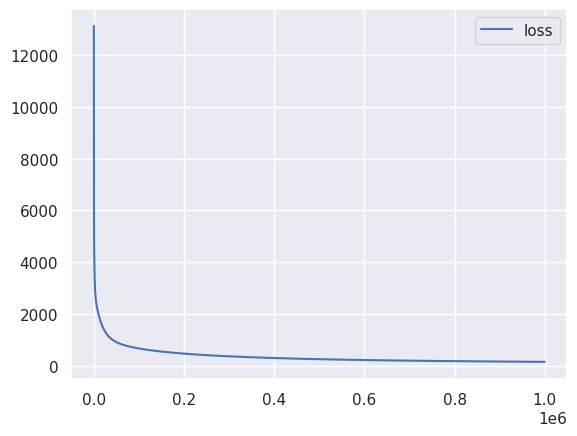

In [140]:
sns.lineplot(x=range(len(losses_starbucks)), y=losses_starbucks, label='loss')

Q14. Interprétez le modèle : pour combien de calories compte chaque gramme de sucre dans la prédiction ? Et chaque gramme de caféine ?

In [164]:
poids = df_starbucks.columns[1:].to_list()
poids.remove('Calories')

p = poids

# poids = map(lambda x: float(f'{W_starbucks_learned[p.index(x)]:.3f}'), poids) # ne peut pas utiliser poids en params 1 et 2, d'ou l'utilisation de la copie p
end = zip(poids, W_starbucks_learned)
# for x, y in end:
#     print(f'{x.strip().ljust(max(map(lambda x: len(x), poids)))}: {y:.3f}')
df_end = pd.DataFrame(end, columns=['Poids', 'Valeur'])
df_end

,Poids,Valeur
0,Beverage_prep,0.201657
1,Total Fat (g),-0.278464
2,Trans Fat (g),0.340252
3,Saturated Fat (g),4.221955
4,Sodium (mg),1.553718
5,Total Carbohydrates (g),0.832224
6,Cholesterol (mg),0.610957
7,Dietary Fibre (g),0.032532
8,Sugars (g),2.756444
9,Protein (g),1.001043


## Exercice bonus : Régression logistique

*Cet exercice est en bonus, vous pouvez le faire si vous avez le temps ou que vous êtes curieux.*

Nous allons ré-utiliser les données de Starbucks, cette fois-ci pour faire une régression logistique. La régression logistique consiste à prédire la probabilité qu'un individu appartienne à une classe donnée ; pour cette raison, on l'utilise souvent pour faire de la classification (en utilisant un seuil de probabilité, par exemple 50% : si la prédiction est au-dessus de 50%, on prédit que l'individu appartient à la classe).

On va chercher à prédire si la boisson est un *Classique Espresso Drinks* (`Beverage_category == 1`) ou un *Tazo® Tea Drinks* (`Beverage_category == 3`).
(Il s'agit donc d'un problème de classification *binaire*, nous pourrions prédire pour chaque classe mais c'est un peu plus compliqué !)

Q1. Préparez les données : créez un DataFrame `df4` qui ne contiendra que les lignes de `df3` pour lesquelles `Beverage_category` vaut `1` ou `3`. Supprimez également la colonne `Beverage`. Remplacez ensuite les valeurs de `Beverage_category` pour que la classe `1` devienne `0`, et la classe `3` devienne `1`.

<details>
<summary>Astuce</summary>

Utilisez la méthode [df.replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
</details>

Q2. Affichez les valeurs de toutes les colonns numériques, en groupant selon qu'il s'agisse d'un espresso (classe 1) ou d'un thé (classe 3).

<details>
<summary>Astuce</summary>

On cherche à afficher des données numériques, en fonction d'une donnée catégorielle. Il existe de nombreuses méthodes pour cela dans [Seaborn](https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions). Essayez par exemple un [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) ou un [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html).
</details>

Q3. Séparez les données en `X4_train`, `Y4_train`, `X4_test`, `Y4_test`, sachant que l'on cherche à prédire la classe `Beverage_category`, et que toutes les autres colonnes sont les features.

Q4. Nous allons maintenant implémenter la Régression Logistique avec descente de gradient.

Rappel : la régression logistique utilise une fonction de sortie différente de la régression linéaire (sigmoïde au lieu d'une combinaison linéaire), la fonction de perte et le gradient seront donc différents également.
Le modèle est :

$$
y = sigmoid_w(x) = \frac{1}{1 + e^{-w \cdot x}}
$$

Implémentez la fonction `logistic_model(X, w)` qui retourne les prédictions (probabilités) pour chaque $x_i$ dans $X$, en fonction des paramètres $w$.

Q5. Implémentez la fonction de coût `logistic_loss(X, Y, w)` associée à une sortie sigmoïde.

Rappel :
La fonction de coût est le *log loss* ou *binary cross-entropy* :

$$
J(w) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \times log(sigmoid_w(x_i)) + (1 - y_i) \times log(1 - sigmoid_w(x_i)) \right]
$$

<details>
<summary>Astuce</summary>

Vous aurez probablement besoin d'ajouter un très léger $\epsilon$ (par exemple : $10^{-7}$) à l'intérieur des appels à $log$, car $log(0) = -\inf$, ce qui cause des *warnings* dans NumPy (et n'est pas une donnée facile à traiter, comme NaN).
</details>


<details>
<summary>Détails de la cross-entropy binaire</summary>

Cette fonction est assez intuitive quand on part de l'autre sens : quelle est la classe réelle, la prédiction, et donc quelle erreur veut-on donner ?

- Quand la classe $y_i$ vaut $1$ :

On veut que la prédiction (la probabilité que l'élément appartienne à la classe $1$) s'approche le plus possible de $1$.
La prédiction (nommée $p$ pour faire plus simple) est donnée par $p = sigmoid_w(x_i)$. On veut donc que le coût soit très élevé quand $p$ tend vers $0$, et que le coût soit minimal quand $p$ tend vers $1$. La fonction $log$ a presque ce comportement : elle tend vers $-\inf$ quand $p$ tend vers $0$, et vaut $0$ quand $p$ vaut $1$. On prend donc simplement l'opposé : $-log(p)$.

On ne veut cela que quand $y_i = 1$, donc on multiplie par $y_i$ ($y_i$ ne peut être que $0$ ou $1$) : $y_i \times (-log(sigmoid_w(x_i)))$. (Nous venons de retrouver le premier terme de la somme, simplement le $-$ est sorti de la somme dans la fonction de coût moyennée.)

- Quand la classe $y_0$ vaut $0$ :

On veut que la prédiction s'approche le plus possible de $0$. Là encore, $p = sigmoid_w(x_i)$. On veut que le coût soit très élevé quand $p$ tend vers $1$, et minimal quand $p$ tend vers $0$. On rappelle que $-log(p)$ tend vers $+\inf$ quand $p$ tend vers $0$, et vaut $0$ quand $p = 1$. On prend donc $-log(1 - p)$, qui vaut $0$ quand $p = 0$ (càd que $1 - p = 1$), et qui tend vers $+\inf$ quand $p$ tend vers $1$ (càd que $1 - p$ tend vers $0$).

Là encore, on ne veut cela que quand $y_i = 0$, donc on multiplie par $(1 - y_i)$ : $(1 - y_i) \times (-log(1 - sigmoid_w(x_i)))$. (Nous venons de retrouver le deuxième terme de la somme).

Pour s'en convaincre graphiquement :

<iframe src="https://www.desmos.com/calculator/zkwbrcpcwt?embed" width="500" height="500" style="border: 1px solid #ccc" frameborder=0></iframe>

La courbe rouge est $-log(p)$ ; la courbe bleue est $-log(1-p)$.

- Au final :

On additionne les 2 termes précédents : $y_i \times (-log(sigmoid_w(x_i))) + (1 - y_i) \times (-log(1 - sigmoid_w(x_i)))$. Comme on l'a vu, selon que la classe soit $0$ ou $1$, l'un des 2 termes va s'annuler et il ne restera donc que l'autre : on vient d'écrire un `if` sous forme d'addition de 2 termes !

Finalement, on fait la somme pour tous les $i$, on factorise le $-$ (dans $-log$) hors de la somme, et on divise par $n$ pour faire une erreur moyenne. 
</details>

Q6. Implémentez la fonction de gradient `logistic_grad(X, Y, w)`.

Le gradient de la binary cross-entropy est :

$$
\nabla J(w) = \frac{1}{n} \sum_{i=1}^{n} (sigmoid_w(x_i) - y_i)x_i
$$

Q7. Implémentez la descente de gradient `logistic_gradient_descend(X, Y, w, learning_rate, n_iterations)` (l'algorithme est le même que pour la régression linéaire, il faut simplement utiliser les nouvelles méthodes).

Q8. Générez des paramètres `w4` (de taille $k$ correspondante aux features) et utilisez la descente de gradient pour apprendre les paramètres optimaux `w4_learned`.

Q9. Affichez la log loss pour chaque itération, ainsi que la loss finale.

Q10. Vérifiez la log loss sur les données de test.

<details>
<summary>Astuce</summary>

Si vous avez ajouté un $\epsilon$ dans les appels à $log$, pensez à le mettre à $0$ ici, sinon la loss ne correspondra pas tout à fait aux prédictions du modèle ! Ce n'est pas grave en entraînement, car on itère progressivement et on utilise le gradient qui, lui, ne prend pas en compte cet $\epsilon$, mais pour le test on veut savoir à quel point le modèle "performe bien".
</details>

Q11. On peut également utiliser un autre score pour vérifier que les prédictions sont correctes sur les données de test : la *0-1 loss*.

Elle consiste à compter le nombre de fois qu'une prédiction est différente du label, puis à diviser par le nombre d'individus pour obtenir un ratio entre $0$ et $1$. Idéalement, une *0-1 loss* de $0$ indique que nous avons correctement prédit le label à chaque fois, tandis qu'une *0-1 loss* de $1$ indique que nous nous sommes trompés à chaque fois (peu importe comment on s'est trompés).

Attention : n'oubliez pas que le modèle produit des **probabilités** en sortie, on veut à la place une classe ! Utilisez par exemple un seuil de prédiction à $0.5$, c'est-à-dire que si la probabilité est $<0.5$, on suppose que la classe est 0, et si la probabilité est $>0.5$, on suppose que la classe est 1.

Implémentez la fonction `loss01(X, Y, w)`.

<details>
<summary>Pourquoi n'utilise-t-on pas la 0-1 loss pour apprendre le modèle ?</summary>

Parce qu'elle n'est pas différentiable, et donc on ne peut pas appliquer la descente de gradient, contrairement à la *cross-entropy loss*.

</details>

Q12. Vérifiez votre 0-1 loss sur les données d'entrainement : normalement le modèle devrait faire un sans-faute.

Q13. Vérifiez maintenant la 0-1 loss sur les données de test.